In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
# import import_ipynb
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras import layers

from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model, Sequential

from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
import cv2
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
# import imshow
%matplotlib inline

from keras import backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.9/dist-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [ ]:
!unzip /content/gdrive/MyDrive/retinosds/3_Class_Gaussian.zip

Archive:  /content/gdrive/MyDrive/retinosds/3_Class_Gaussian.zip
   creating: 3_Class_Gaussian/Test/
   creating: 3_Class_Gaussian/Test/Moderate_Dr/
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e06d3d4733f0.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e07045d7c5f7.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e0863b353093.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e10190a9d52f.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e12b67835e03.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e12d41e7b221.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e1418d28d668.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e150935f66a6.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e16fc934069f.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e17507a4a1f5.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e2161692a0b4.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e229aca862c7.png  
  inflating: 3_Class_Gaussian/Test/Moderate_Dr/e25ccfe38e44

In [ ]:
train_dir = "/content/3_Class_Gaussian/Train"
test_dir = "/content/3_Class_Gaussian/Test"
val_dir="/content/3_Class_Gaussian/Validation"

In [ ]:
train = ImageDataGenerator(rescale= 1./255, validation_split = 0.2)
validation = ImageDataGenerator(rescale= 1./255)
test= ImageDataGenerator(rescale= 1./255)

In [ ]:
train_dataset= train.flow_from_directory(train_dir,
                                         target_size= (224,224),
                                         class_mode= 'categorical',
                                         subset = "training"
                                        )
validation_dataset= train.flow_from_directory(val_dir,
                                                   target_size= (224, 224),
                                                   class_mode= 'categorical',
                                                   subset = "validation"
                                                  )
test_dataset= test.flow_from_directory(test_dir,
                                       target_size= (224, 224),
                                       class_mode= 'categorical'
                                      )


Found 2344 images belonging to 3 classes.
Found 72 images belonging to 3 classes.
Found 367 images belonging to 3 classes.


In [ ]:
model_d= tf.keras.applications.densenet.DenseNet121()


33188688/33188688 [==============================] - 2s 0us/step


In [ ]:
x= model_d.layers[-3].output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x)
x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

predictions= Dense(3, activation = 'softmax')(x)
model= Model(inputs= model_d.input, outputs= predictions)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("/content/weights-improvement-{epoch:02d}-{val_accuracy:0.2f}.hd", monitor="val_acc", verbose=1, save_best_only=True, mode="max")
callbacks_list = [checkpoint]

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                                  tf.keras.metrics.Precision(),
                                                                                                  tf.keras.metrics.Recall()])

In [ ]:
history= model.fit(train_dataset,
                   steps_per_epoch= 20,
                   validation_data= validation_dataset,
                   validation_steps= 3,
                   shuffle=2,
                   verbose=1,
                   epochs = 50,
                   batch_size = 32,
                   #callbacks=callbacks_list
                   )


Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 1.2366 - accuracy: 0.5781 - precision: 0.5940 - recall: 0.5531

20/20 [==============================] - 87s 605ms/step - loss: 1.2366 - accuracy: 0.5781 - precision: 0.5940 - recall: 0.5531 - val_loss: 0.8940 - val_accuracy: 0.5694 - val_precision: 0.6170 - val_recall: 0.4028
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.8267 - accuracy: 0.7047 - precision: 0.7092 - recall: 0.6859

20/20 [==============================] - 8s 382ms/step - loss: 0.8267 - accuracy: 0.7047 - precision: 0.7092 - recall: 0.6859 - val_loss: 1.1222 - val_accuracy: 0.4167 - val_precision: 0.4821 - val_recall: 0.3750
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.7415 - accuracy: 0.7609 - precision: 0.7624 - recall: 0.7422

20/20 [==============================] - 8s 392ms/step - loss: 0.7415 - accuracy: 0.7609 - precision: 0.7624 - recall: 0.7422 - val_loss: 1.0861 - val_accuracy: 0.4722 - val_precision: 0.4921 - val_recall: 0.4306
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.7703 - precision: 0.7799 - recall: 0.7641

20/20 [==============================] - 8s 386ms/step - loss: 0.6921 - accuracy: 0.7703 - precision: 0.7799 - recall: 0.7641 - val_loss: 0.8013 - val_accuracy: 0.6389 - val_precision: 0.6964 - val_recall: 0.5417
Epoch 5/50
20/20 [==============================] - ETA: 0s - loss: 0.5699 - accuracy: 0.7812 - precision: 0.7873 - recall: 0.7750

20/20 [==============================] - 8s 375ms/step - loss: 0.5699 - accuracy: 0.7812 - precision: 0.7873 - recall: 0.7750 - val_loss: 0.6584 - val_accuracy: 0.8194 - val_precision: 0.8308 - val_recall: 0.7500
Epoch 6/50
20/20 [==============================] - ETA: 0s - loss: 0.6077 - accuracy: 0.7812 - precision: 0.7864 - recall: 0.7766

20/20 [==============================] - 8s 379ms/step - loss: 0.6077 - accuracy: 0.7812 - precision: 0.7864 - recall: 0.7766 - val_loss: 0.5199 - val_accuracy: 0.8194 - val_precision: 0.8485 - val_recall: 0.7778
Epoch 7/50
20/20 [==============================] - ETA: 0s - loss: 0.4967 - accuracy: 0.8234 - precision: 0.8281 - recall: 0.8203

20/20 [==============================] - 8s 390ms/step - loss: 0.4967 - accuracy: 0.8234 - precision: 0.8281 - recall: 0.8203 - val_loss: 0.5040 - val_accuracy: 0.8472 - val_precision: 0.8592 - val_recall: 0.8472
Epoch 8/50
20/20 [==============================] - ETA: 0s - loss: 0.5117 - accuracy: 0.8188 - precision: 0.8215 - recall: 0.8125

20/20 [==============================] - 8s 371ms/step - loss: 0.5117 - accuracy: 0.8188 - precision: 0.8215 - recall: 0.8125 - val_loss: 0.5808 - val_accuracy: 0.8194 - val_precision: 0.8636 - val_recall: 0.7917
Epoch 9/50
20/20 [==============================] - ETA: 0s - loss: 0.5439 - accuracy: 0.8031 - precision: 0.8085 - recall: 0.7984

20/20 [==============================] - 8s 383ms/step - loss: 0.5439 - accuracy: 0.8031 - precision: 0.8085 - recall: 0.7984 - val_loss: 0.6795 - val_accuracy: 0.7917 - val_precision: 0.7941 - val_recall: 0.7500
Epoch 10/50
20/20 [==============================] - ETA: 0s - loss: 0.4358 - accuracy: 0.8406 - precision: 0.8468 - recall: 0.8375

20/20 [==============================] - 7s 372ms/step - loss: 0.4358 - accuracy: 0.8406 - precision: 0.8468 - recall: 0.8375 - val_loss: 0.7696 - val_accuracy: 0.7778 - val_precision: 0.7971 - val_recall: 0.7639
Epoch 11/50
20/20 [==============================] - ETA: 0s - loss: 0.4556 - accuracy: 0.8490 - precision: 0.8536 - recall: 0.8425

20/20 [==============================] - 9s 452ms/step - loss: 0.4556 - accuracy: 0.8490 - precision: 0.8536 - recall: 0.8425 - val_loss: 0.6877 - val_accuracy: 0.8333 - val_precision: 0.8382 - val_recall: 0.7917
Epoch 12/50
20/20 [==============================] - ETA: 0s - loss: 0.4730 - accuracy: 0.8203 - precision: 0.8228 - recall: 0.8125

20/20 [==============================] - 8s 395ms/step - loss: 0.4730 - accuracy: 0.8203 - precision: 0.8228 - recall: 0.8125 - val_loss: 0.5061 - val_accuracy: 0.8472 - val_precision: 0.8714 - val_recall: 0.8472
Epoch 13/50
20/20 [==============================] - ETA: 0s - loss: 0.3941 - accuracy: 0.8578 - precision: 0.8589 - recall: 0.8562

20/20 [==============================] - 8s 379ms/step - loss: 0.3941 - accuracy: 0.8578 - precision: 0.8589 - recall: 0.8562 - val_loss: 0.5953 - val_accuracy: 0.8472 - val_precision: 0.8472 - val_recall: 0.8472
Epoch 14/50
20/20 [==============================] - ETA: 0s - loss: 0.4050 - accuracy: 0.8604 - precision: 0.8613 - recall: 0.8571

20/20 [==============================] - 7s 369ms/step - loss: 0.4050 - accuracy: 0.8604 - precision: 0.8613 - recall: 0.8571 - val_loss: 0.5097 - val_accuracy: 0.8333 - val_precision: 0.8451 - val_recall: 0.8333
Epoch 15/50
20/20 [==============================] - ETA: 0s - loss: 0.3585 - accuracy: 0.8685 - precision: 0.8709 - recall: 0.8653

20/20 [==============================] - 7s 358ms/step - loss: 0.3585 - accuracy: 0.8685 - precision: 0.8709 - recall: 0.8653 - val_loss: 0.6353 - val_accuracy: 0.8056 - val_precision: 0.8056 - val_recall: 0.8056
Epoch 16/50
20/20 [==============================] - ETA: 0s - loss: 0.3394 - accuracy: 0.8750 - precision: 0.8776 - recall: 0.8734

20/20 [==============================] - 8s 371ms/step - loss: 0.3394 - accuracy: 0.8750 - precision: 0.8776 - recall: 0.8734 - val_loss: 0.6710 - val_accuracy: 0.8194 - val_precision: 0.8194 - val_recall: 0.8194
Epoch 17/50
20/20 [==============================] - ETA: 0s - loss: 0.3285 - accuracy: 0.8797 - precision: 0.8807 - recall: 0.8766

20/20 [==============================] - 8s 378ms/step - loss: 0.3285 - accuracy: 0.8797 - precision: 0.8807 - recall: 0.8766 - val_loss: 0.6775 - val_accuracy: 0.8056 - val_precision: 0.8056 - val_recall: 0.8056
Epoch 18/50
20/20 [==============================] - ETA: 0s - loss: 0.3144 - accuracy: 0.8961 - precision: 0.9015 - recall: 0.8912

20/20 [==============================] - 7s 360ms/step - loss: 0.3144 - accuracy: 0.8961 - precision: 0.9015 - recall: 0.8912 - val_loss: 0.5842 - val_accuracy: 0.8194 - val_precision: 0.8194 - val_recall: 0.8194
Epoch 19/50
20/20 [==============================] - ETA: 0s - loss: 0.3059 - accuracy: 0.8929 - precision: 0.8934 - recall: 0.8847

20/20 [==============================] - 7s 372ms/step - loss: 0.3059 - accuracy: 0.8929 - precision: 0.8934 - recall: 0.8847 - val_loss: 0.7552 - val_accuracy: 0.8194 - val_precision: 0.8194 - val_recall: 0.8194
Epoch 20/50
20/20 [==============================] - ETA: 0s - loss: 0.2928 - accuracy: 0.8969 - precision: 0.8991 - recall: 0.8906

20/20 [==============================] - 8s 379ms/step - loss: 0.2928 - accuracy: 0.8969 - precision: 0.8991 - recall: 0.8906 - val_loss: 0.6037 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 21/50
20/20 [==============================] - ETA: 0s - loss: 0.2248 - accuracy: 0.9234 - precision: 0.9246 - recall: 0.9203

20/20 [==============================] - 8s 371ms/step - loss: 0.2248 - accuracy: 0.9234 - precision: 0.9246 - recall: 0.9203 - val_loss: 0.7601 - val_accuracy: 0.8472 - val_precision: 0.8472 - val_recall: 0.8472
Epoch 22/50
20/20 [==============================] - ETA: 0s - loss: 0.1674 - accuracy: 0.9359 - precision: 0.9373 - recall: 0.9344

20/20 [==============================] - 8s 384ms/step - loss: 0.1674 - accuracy: 0.9359 - precision: 0.9373 - recall: 0.9344 - val_loss: 0.5921 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 23/50
20/20 [==============================] - ETA: 0s - loss: 0.2011 - accuracy: 0.9237 - precision: 0.9267 - recall: 0.9237

20/20 [==============================] - 8s 379ms/step - loss: 0.2011 - accuracy: 0.9237 - precision: 0.9267 - recall: 0.9237 - val_loss: 0.5174 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 24/50
20/20 [==============================] - ETA: 0s - loss: 0.2635 - accuracy: 0.8875 - precision: 0.8917 - recall: 0.8875

20/20 [==============================] - 8s 380ms/step - loss: 0.2635 - accuracy: 0.8875 - precision: 0.8917 - recall: 0.8875 - val_loss: 0.6333 - val_accuracy: 0.8611 - val_precision: 0.8611 - val_recall: 0.8611
Epoch 25/50
20/20 [==============================] - ETA: 0s - loss: 0.2325 - accuracy: 0.9156 - precision: 0.9156 - recall: 0.9156

20/20 [==============================] - 8s 398ms/step - loss: 0.2325 - accuracy: 0.9156 - precision: 0.9156 - recall: 0.9156 - val_loss: 0.5912 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 26/50
20/20 [==============================] - ETA: 0s - loss: 0.2523 - accuracy: 0.9141 - precision: 0.9155 - recall: 0.9141

20/20 [==============================] - 7s 369ms/step - loss: 0.2523 - accuracy: 0.9141 - precision: 0.9155 - recall: 0.9141 - val_loss: 0.7127 - val_accuracy: 0.8472 - val_precision: 0.8472 - val_recall: 0.8472
Epoch 27/50
20/20 [==============================] - ETA: 0s - loss: 0.1780 - accuracy: 0.9302 - precision: 0.9301 - recall: 0.9286

20/20 [==============================] - 7s 370ms/step - loss: 0.1780 - accuracy: 0.9302 - precision: 0.9301 - recall: 0.9286 - val_loss: 0.6316 - val_accuracy: 0.8889 - val_precision: 0.8889 - val_recall: 0.8889
Epoch 28/50
20/20 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9328 - precision: 0.9324 - recall: 0.9266

20/20 [==============================] - 8s 380ms/step - loss: 0.1859 - accuracy: 0.9328 - precision: 0.9324 - recall: 0.9266 - val_loss: 0.7637 - val_accuracy: 0.8889 - val_precision: 0.8889 - val_recall: 0.8889
Epoch 29/50
20/20 [==============================] - ETA: 0s - loss: 0.1827 - accuracy: 0.9302 - precision: 0.9302 - recall: 0.9302

20/20 [==============================] - 8s 380ms/step - loss: 0.1827 - accuracy: 0.9302 - precision: 0.9302 - recall: 0.9302 - val_loss: 0.6908 - val_accuracy: 0.8889 - val_precision: 0.8889 - val_recall: 0.8889
Epoch 30/50
20/20 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.9416 - precision: 0.9430 - recall: 0.9399

20/20 [==============================] - 7s 365ms/step - loss: 0.1699 - accuracy: 0.9416 - precision: 0.9430 - recall: 0.9399 - val_loss: 0.7544 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 31/50
20/20 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.9156 - precision: 0.9156 - recall: 0.9156

20/20 [==============================] - 8s 385ms/step - loss: 0.2410 - accuracy: 0.9156 - precision: 0.9156 - recall: 0.9156 - val_loss: 0.8044 - val_accuracy: 0.8472 - val_precision: 0.8472 - val_recall: 0.8472
Epoch 32/50
20/20 [==============================] - ETA: 0s - loss: 0.2443 - accuracy: 0.9172 - precision: 0.9186 - recall: 0.9172

20/20 [==============================] - 8s 374ms/step - loss: 0.2443 - accuracy: 0.9172 - precision: 0.9186 - recall: 0.9172 - val_loss: 0.7262 - val_accuracy: 0.8611 - val_precision: 0.8611 - val_recall: 0.8611
Epoch 33/50
20/20 [==============================] - ETA: 0s - loss: 0.1712 - accuracy: 0.9399 - precision: 0.9398 - recall: 0.9383

20/20 [==============================] - 8s 373ms/step - loss: 0.1712 - accuracy: 0.9399 - precision: 0.9398 - recall: 0.9383 - val_loss: 0.7511 - val_accuracy: 0.8611 - val_precision: 0.8611 - val_recall: 0.8611
Epoch 34/50
20/20 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.9237 - precision: 0.9237 - recall: 0.9237

20/20 [==============================] - 8s 371ms/step - loss: 0.2156 - accuracy: 0.9237 - precision: 0.9237 - recall: 0.9237 - val_loss: 0.7537 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 35/50
20/20 [==============================] - ETA: 0s - loss: 0.2317 - accuracy: 0.9328 - precision: 0.9326 - recall: 0.9297

20/20 [==============================] - 8s 388ms/step - loss: 0.2317 - accuracy: 0.9328 - precision: 0.9326 - recall: 0.9297 - val_loss: 0.5578 - val_accuracy: 0.8889 - val_precision: 0.8889 - val_recall: 0.8889
Epoch 36/50
20/20 [==============================] - ETA: 0s - loss: 0.1681 - accuracy: 0.9318 - precision: 0.9333 - recall: 0.9318

20/20 [==============================] - 7s 364ms/step - loss: 0.1681 - accuracy: 0.9318 - precision: 0.9333 - recall: 0.9318 - val_loss: 0.4951 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 37/50
20/20 [==============================] - ETA: 0s - loss: 0.1142 - accuracy: 0.9609 - precision: 0.9608 - recall: 0.9578

20/20 [==============================] - 8s 380ms/step - loss: 0.1142 - accuracy: 0.9609 - precision: 0.9608 - recall: 0.9578 - val_loss: 0.4265 - val_accuracy: 0.8611 - val_precision: 0.8611 - val_recall: 0.8611
Epoch 38/50
20/20 [==============================] - ETA: 0s - loss: 0.1357 - accuracy: 0.9448 - precision: 0.9479 - recall: 0.9448

20/20 [==============================] - 8s 383ms/step - loss: 0.1357 - accuracy: 0.9448 - precision: 0.9479 - recall: 0.9448 - val_loss: 0.7431 - val_accuracy: 0.8333 - val_precision: 0.8333 - val_recall: 0.8333
Epoch 39/50
20/20 [==============================] - ETA: 0s - loss: 0.1200 - accuracy: 0.9609 - precision: 0.9609 - recall: 0.9609

20/20 [==============================] - 8s 372ms/step - loss: 0.1200 - accuracy: 0.9609 - precision: 0.9609 - recall: 0.9609 - val_loss: 0.6540 - val_accuracy: 0.8611 - val_precision: 0.8611 - val_recall: 0.8611
Epoch 40/50
20/20 [==============================] - ETA: 0s - loss: 0.1163 - accuracy: 0.9641 - precision: 0.9641 - recall: 0.9641

20/20 [==============================] - 8s 380ms/step - loss: 0.1163 - accuracy: 0.9641 - precision: 0.9641 - recall: 0.9641 - val_loss: 0.6845 - val_accuracy: 0.8194 - val_precision: 0.8194 - val_recall: 0.8194
Epoch 41/50
20/20 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9610 - precision: 0.9626 - recall: 0.9610

20/20 [==============================] - 7s 383ms/step - loss: 0.1003 - accuracy: 0.9610 - precision: 0.9626 - recall: 0.9610 - val_loss: 0.8349 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 42/50
20/20 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9750 - precision: 0.9765 - recall: 0.9734

20/20 [==============================] - 8s 373ms/step - loss: 0.0741 - accuracy: 0.9750 - precision: 0.9765 - recall: 0.9734 - val_loss: 0.8376 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 43/50
20/20 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9724 - precision: 0.9724 - recall: 0.9724

20/20 [==============================] - 7s 366ms/step - loss: 0.1018 - accuracy: 0.9724 - precision: 0.9724 - recall: 0.9724 - val_loss: 0.7656 - val_accuracy: 0.7917 - val_precision: 0.7917 - val_recall: 0.7917
Epoch 44/50
20/20 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.9672 - precision: 0.9672 - recall: 0.9672

20/20 [==============================] - 8s 381ms/step - loss: 0.0835 - accuracy: 0.9672 - precision: 0.9672 - recall: 0.9672 - val_loss: 0.7427 - val_accuracy: 0.8194 - val_precision: 0.8194 - val_recall: 0.8194
Epoch 45/50
20/20 [==============================] - ETA: 0s - loss: 0.1043 - accuracy: 0.9688 - precision: 0.9718 - recall: 0.9688

20/20 [==============================] - 8s 396ms/step - loss: 0.1043 - accuracy: 0.9688 - precision: 0.9718 - recall: 0.9688 - val_loss: 0.7136 - val_accuracy: 0.8611 - val_precision: 0.8611 - val_recall: 0.8611
Epoch 46/50
20/20 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9812 - precision: 0.9812 - recall: 0.9812

20/20 [==============================] - 8s 372ms/step - loss: 0.0563 - accuracy: 0.9812 - precision: 0.9812 - recall: 0.9812 - val_loss: 0.6799 - val_accuracy: 0.8472 - val_precision: 0.8472 - val_recall: 0.8472
Epoch 47/50
20/20 [==============================] - ETA: 0s - loss: 0.0710 - accuracy: 0.9750 - precision: 0.9765 - recall: 0.9750

20/20 [==============================] - 8s 381ms/step - loss: 0.0710 - accuracy: 0.9750 - precision: 0.9765 - recall: 0.9750 - val_loss: 0.5610 - val_accuracy: 0.8472 - val_precision: 0.8472 - val_recall: 0.8472
Epoch 48/50
20/20 [==============================] - ETA: 0s - loss: 0.0743 - accuracy: 0.9734 - precision: 0.9734 - recall: 0.9734

20/20 [==============================] - 8s 395ms/step - loss: 0.0743 - accuracy: 0.9734 - precision: 0.9734 - recall: 0.9734 - val_loss: 0.6755 - val_accuracy: 0.8194 - val_precision: 0.8194 - val_recall: 0.8194
Epoch 49/50
20/20 [==============================] - ETA: 0s - loss: 0.0564 - accuracy: 0.9756 - precision: 0.9756 - recall: 0.9756

20/20 [==============================] - 7s 359ms/step - loss: 0.0564 - accuracy: 0.9756 - precision: 0.9756 - recall: 0.9756 - val_loss: 0.6480 - val_accuracy: 0.8194 - val_precision: 0.8194 - val_recall: 0.8194
Epoch 50/50
20/20 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9870 - precision: 0.9870 - recall: 0.9870

20/20 [==============================] - 8s 373ms/step - loss: 0.0432 - accuracy: 0.9870 - precision: 0.9870 - recall: 0.9870 - val_loss: 0.6936 - val_accuracy: 0.8333 - val_precision: 0.8333 - val_recall: 0.8333


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the trained model
#model = tf.keras.models.load_model('path/to/model')

# Load the new image and preprocess it
img = Image.open('/content/3_Class_Gaussian/Test/Severe_Dr/f5a8c6426a71.png').resize((224, 224))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)

# Pass the preprocessed image to the model
pred = model.predict(img)

# Get the index of the class with the highest probability
pred_class = np.argmax(pred)

# Map the index of the predicted class to its corresponding label
if pred_class == 0:
    pred_label = 'No diabetic retinopathy'
elif pred_class == 1:
    pred_label = 'Mild diabetic retinopathy'
elif pred_class == 2:
    pred_label = 'Moderate diabetic retinopathy'
elif pred_class == 3:
    pred_label = 'Severe diabetic retinopathy'
else:
    pred_label = 'Proliferative diabetic retinopathy'

print('Predicted type of diabetic retinopathy:', pred_label)

1/1 [==============================] - 0s 36ms/step
Predicted type of diabetic retinopathy: No diabetic retinopathy


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/savedmodels/threeclass.hdf5')

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Load the model
#model = tf.keras.models.load_model('my_model.h5')

# Load the test data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Use the model to predict the labels of the test data
y_pred = model.predict(test_ds)

# Get the true labels of the test data
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Convert the predicted and true labels to integer classes
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print('Confusion matrix:')
print(cm)

Found 365 files belonging to 5 classes.
12/12 [==============================] - 5s 193ms/step
Confusion matrix:
[[  0   0   2  32   3]
 [  0   0   2  96   1]
 [  0   0   3 168  10]
 [  0   0   0  29   0]
 [  0   0   0  18   1]]


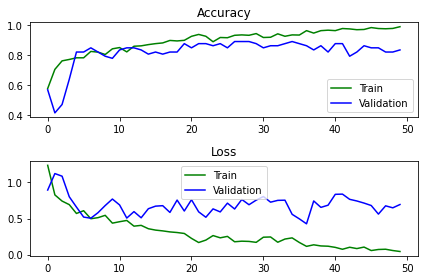


train_accuracy :  [0.578125, 0.7046874761581421, 0.760937511920929, 0.770312488079071, 0.78125, 0.78125, 0.823437511920929, 0.8187500238418579, 0.8031250238418579, 0.840624988079071, 0.8490259647369385, 0.8203125, 0.8578125238418579, 0.8603895902633667, 0.8685064911842346, 0.875, 0.879687488079071, 0.8961039185523987, 0.8928571343421936, 0.8968750238418579, 0.9234374761581421, 0.9359375238418579, 0.923701286315918, 0.887499988079071, 0.9156249761581421, 0.9140625, 0.9301947951316833, 0.932812511920929, 0.9301947951316833, 0.9415584206581116, 0.9156249761581421, 0.917187511920929, 0.9399350881576538, 0.923701286315918, 0.932812511920929, 0.9318181872367859, 0.9609375, 0.9448052048683167, 0.9609375, 0.964062511920929, 0.9610389471054077, 0.9750000238418579, 0.9724025726318359, 0.9671875238418579, 0.96875, 0.981249988079071, 0.9750000238418579, 0.973437488079071, 0.975649356842041, 0.9870129823684692]
valid_accuracy :  [0.5694444179534912, 0.4166666567325592, 0.4722222089767456, 0.638888

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

train_err = history.history["loss"]
valid_err = history.history["val_loss"]


print("train_accuracy : ", train_accuracy)
print("valid_accuracy : ", valid_accuracy)
print("train_err : ", train_err)
print("valid_err : ", valid_err)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Load the trained model from file
model = joblib.load('model.joblib')

# Load the test data set into memory
X_test = load_test_data() # function to load test data

# Preprocess the test data set
X_test = preprocess(X_test) # function to preprocess data

# Use the trained model to make predictions on the test data set
y_pred = model.predict(X_test)

# Load the ground truth labels (if available)
y_true = load_ground_truth() # function to load ground truth labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
cm = confusion_matrix(y_true, y_pred)

# Output the evaluation results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Confusion Matrix:\n{cm}')


FileNotFoundError: ignored